In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics

In [2]:
train=pd.read_csv("Train.csv")
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
train = pd.get_dummies(train, columns=['Item_Identifier','Item_Fat_Content','Outlet_Size','Item_Type','Outlet_Identifier','Outlet_Location_Type', 'Outlet_Type'])
train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,443.4228,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,732.3800,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,2002,549.2850,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1193.1136,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,2009,1845.5976,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [4]:
train.isnull().sum()

Item_Weight                      1463
Item_Visibility                     0
Item_MRP                            0
Outlet_Establishment_Year           0
Item_Outlet_Sales                   0
                                 ... 
Outlet_Location_Type_Tier 3         0
Outlet_Type_Grocery Store           0
Outlet_Type_Supermarket Type1       0
Outlet_Type_Supermarket Type2       0
Outlet_Type_Supermarket Type3       0
Length: 1605, dtype: int64

In [5]:
train.fillna(method='ffill', inplace=True)

In [1]:
Xvars=train.drop(columns='Item_Outlet_Sales')
Xvars

NameError: name 'train' is not defined

In [7]:
Yvars=train['Item_Outlet_Sales']
Yvars

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Xvars, Yvars, test_size=0.3, random_state=0)

In [15]:
regressor=RandomForestRegressor(n_estimators=1000,random_state=42)

In [16]:
regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [20]:
y_pred_train=regressor.predict(x_train)
y_pred_train


array([1076.9954168, 1989.956356 , 3739.042917 , ..., 1404.2081532,
       2532.962862 , 4142.44115  ])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


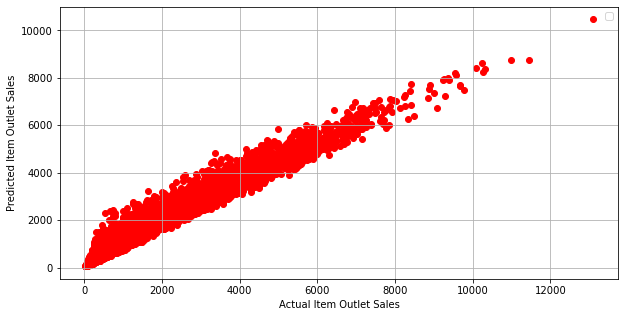

In [21]:
plt.figure(figsize=(10,5))
plt.xlabel("Actual Item Outlet Sales")
plt.ylabel("Predicted Item Outlet Sales")
plt.scatter(y_train,y_pred_train,color='red')
plt.grid()
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
print("R-squared Score: ",r2_score(y_train,y_pred_train))
print("Mean Squared Error: ", mean_squared_error(y_train,y_pred_train))

R-squared Score:  0.9400339602699418
Mean Squared Error:  171145.41607401954


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
train_data = pd.read_csv("Train.csv")

# Preprocessing steps (omitted for brevity)
train_data = pd.get_dummies(train_data, columns=['Item_Identifier','Item_Fat_Content','Outlet_Size','Item_Type','Outlet_Identifier','Outlet_Location_Type', 'Outlet_Type'])
train_data.fillna(method='ffill', inplace=True)

# Split the data
X = train_data.drop(columns='Item_Outlet_Sales')
Y = train_data['Item_Outlet_Sales']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)  # You can adjust the number of trees (n_estimators)
rf_regressor.fit(x_train, y_train)
y_pred_train_rf = rf_regressor.predict(x_train)
y_pred_test_rf = rf_regressor.predict(x_test)

# Evaluate Random Forest performance
print("Random Forest:")
print("R-squared Score (Train):", r2_score(y_train, y_pred_train_rf))
print("R-squared Score (Test):", r2_score(y_test, y_pred_test_rf))
print("Mean Squared Error (Train):", mean_squared_error(y_train, y_pred_train_rf))
print("Mean Squared Error (Test):", mean_squared_error(y_test, y_pred_test_rf))


Random Forest:
R-squared Score (Train): 0.9379811745417548
R-squared Score (Test): 0.5470170260848366
Mean Squared Error (Train): 177004.14660121288
Mean Squared Error (Test): 1379370.4159790382
